# Day 4: Data Visualisation - Univariate Analysis

## Task:
- Visu­al­ise the dis­tri­bu­tion of a single vari­able in the data­set.

## De­scrip­tion: 
- Cre­ate his­to­grams, box plots, or ker­nel dens­ity plots to under­stand the dis­tri­bu­tion of in­di­vidu­al vari­ables. 

## What is Univariate Analysis?

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own Descriptive statistics describe and summarize data. Univariate descriptive statistics describe individual variables.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

### Dataset = Black Friday Sales


In [172]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data Preprocessing

- Check basic statistics of the dataset

- Check for missing values in the data

- Check for unique values in data

In [173]:
# Obtain dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 5

In [174]:
# .describe() to obtain the summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [175]:
# Identify NaN values in table format
df.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,False,True,True,False


In [176]:
# Count NaN values in each column
nan_values_count = df.isna().sum()

print("\nCount of NaN values in each column:")

# Print the result
print(nan_values_count)


Count of NaN values in each column:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


## Perform EDA

- Purchase Distribution

- Drop unnecessary columns

- Missing value treatment


In [177]:
# Drop columns with NaN values
df_cleaned = df.dropna(axis=1)

# Print the cleaned DataFrame
print(df_cleaned)


        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1            

In [178]:
# Count NaN values in each column
nan_values_count = df_cleaned.isna().sum()

print("\nCount of NaN values in each column:")

# Print the result
print(nan_values_count)

df = df.dropna(axis=1)

'''
This has dropped all columns containing NaN values from the DataFrame 
and stored the result in a new DataFrame called df_cleaned. 
I have overwritten the original DataFrame, by assigning the 
result back to df via df = df.dropna(axis=1).

Product_Cateogry_2 & ..._3 have now been dropped.
'''


Count of NaN values in each column:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64


'\nThis has dropped all columns containing NaN values from the DataFrame \nand stored the result in a new DataFrame called df_cleaned. \nI have overwritten the original DataFrame, by assigning the \nresult back to df via df = df.dropna(axis=1).\n\nProduct_Cateogry_2 & ..._3 have now been dropped.\n'

## Data Visualisation

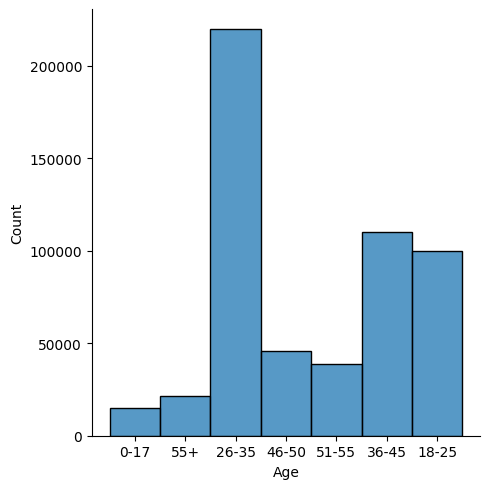

In [179]:
sns.displot(df['Age']);

- The analysis shows that the individuals between the ages of 26-35 made up the highest frequencies of Black Friday purchases.

- With 0-17 making up the lowest frequency.

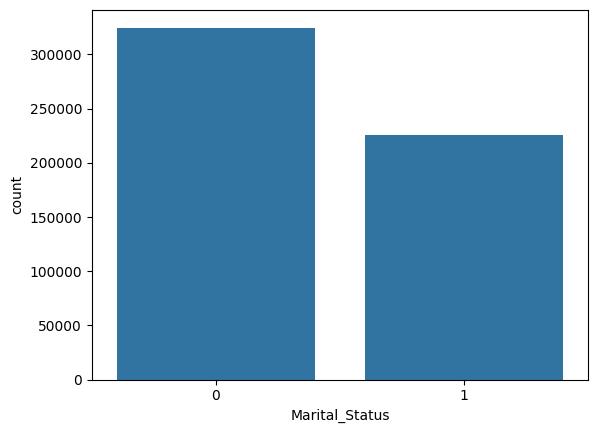

In [180]:
# Bar plot
sns.countplot(x='Marital_Status', data=df)
plt.show()

The analysis shows that most individuals making up the highest frequencies of purchase are single and not married.

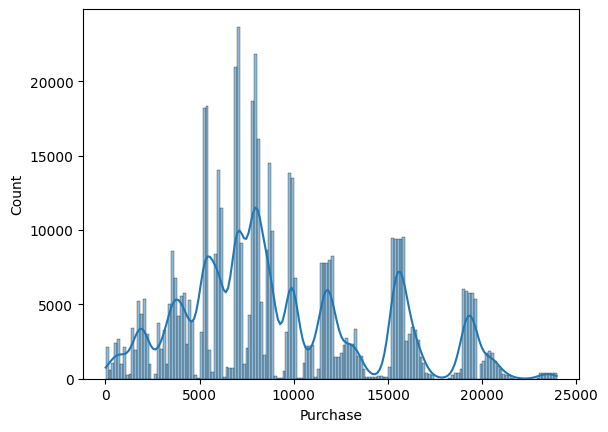

In [181]:
# Histogram
sns.histplot(df['Purchase'], kde = True)
plt.show()

The analysis shows that most purchases were between $5k-10k